# แบบฝึกหัด 6

---

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt
import seaborn as sns

6.1 ร้านค้าออนไลน์ขายเมล็ดพืชหายากชนิดหนึ่ง อ้างว่าเมล็ดที่ขายมีเปอร์เซ็นต์การงอกสูงกว่า 90% จากการทดลองของลูกค้ารายหนึ่งได้สั่งซื้อเมล็ดมาทั้งหมด 100 เมล็ดและพบว่ามี 14 เมล็ดที่ไม่งอก จงทดสอบคำกล่าวอ้างของร้านค้าว่าเป็นจริงหรือไม่ที่ระดับนัยสำคัญ 0.05 หากถือว่าอัตราการงอกของเมล็ดพืชดังกล่าวมีการแจกแจงแบบปกติ

กำหนดให้ P แทนสัดส่วนการงอกของเมล็ดจากร้านค้า  
\
**สมมติฐาน:**  
H0: P<=0.9  
H1: P>0.9

**ค่า z_cal**:  
  

In [3]:
z_cal, p_val = proportions_ztest(count=86,
                                 nobs=100,
                                 value=0.9,
                                 alternative='larger',
                                 prop_var=0.9)
z_cal

-1.3333333333333346

**หาค่า z_crit:**   

In [4]:
z_crit = stats.norm.isf(0.05)
print(z_crit)

1.6448536269514729


**หาค่า p-val:**   

In [5]:
p_val

0.9087887802741323

**สรุปผล:**   

- z_cal อยู่ในบริเวณยอมรับ H0   
- p_val > 0.05  

จึงยอมรับ H0 คำกล่าวอ้างของร้านค้าว่า เมล็ดที่ขายมีเปอร์เซ็นต์การงอกสูงกว่า 90% จึงไม่เป็นความจริง  
  


**กราฟแจกแจงความน่าจะเป็น:**   

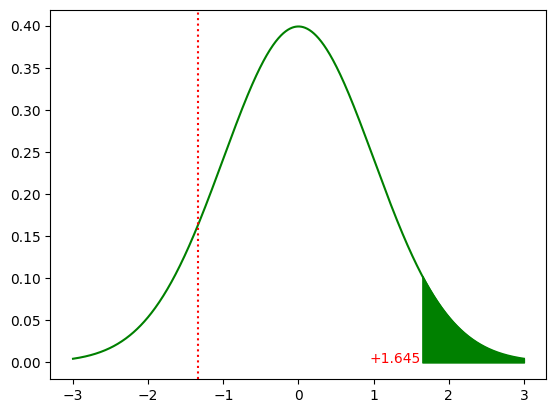

In [9]:
x = np.linspace(-3,3,1000)
y = [stats.norm.pdf(v) for v in x]
Z_critical_right = z_crit

plt.plot(x,y, color='g')
plt.fill_between(x[x>=Z_critical_right],
                 stats.norm.pdf(x[x>=Z_critical_right]),
                 color='g'
                 )
plt.text(Z_critical_right-0.7, 0, f"+{Z_critical_right:.3f}", color='r')
plt.axvline(z_cal, ls=':', color='r')

\
\
6.2 สืบเนื่องจากข้อ 6.1 พบว่ามีร้านค้าออนไลน์อีกเจ้าซึ่งขายเมล็ดพืชหายากชนิดเดียวกันนี้ อ้างว่าเมล็ดที่ขายมีเปอร์เซนต์การงอกสูงกว่า 95% จึงสั่งซื้อมา 50 เมล็ดพบว่ามี 4 เมล็ดที่ไม่งอก จงทดสอบว่าร้านค้านี้ขายเมล็ดซึ่งมีเปอร์เซ็นต์การงอกสูงกว่าร้านค้าแรกมากกว่าหรือเท่ากับ 5% หรือไม่ ที่ระดับนัยสำคัญ 0.05


กำหนดให้   
- P1 แทนสัดส่วนการงอกของเมล็ดจากร้านใหม่  
- P2 แทนสัดส่วนการงอกของเมล็ดจากร้านเดิม  


**สมมติฐาน:**  
H0: P1 - P2 >= 0.05  
H1: P1 - P2 < 0.05

**ค่า z_cal**:  
  

In [3]:
z_cal, p_val = proportions_ztest(count=[46,86],
                                 nobs=[50,100],
                                 value=0.05,
                                 alternative='smaller',  #ตาม H1
                                 prop_var=0.05)
z_cal

0.2649064714130101

**หาค่า z_crit:**   

In [4]:
z_crit = stats.norm.ppf(0.05)
print(z_crit)

-1.6448536269514729


**หาค่า p-val:**   

In [12]:
p_val

0.6044592435396097

**สรุปผล:**   

z_cal อยู่ในบริเวณยอมรับ H0   
p_val > 0.05  
จึงยอมรับ H0 ร้านค้าใหม่นี้ขายเมล็ดซึ่งมีเปอร์เซ็นต์การงอกสูงกว่าร้านค้าแรกมากกว่าหรือเท่ากับ 5% ที่ α = 0.05

**กราฟแจกแจงความน่าจะเป็น:**   

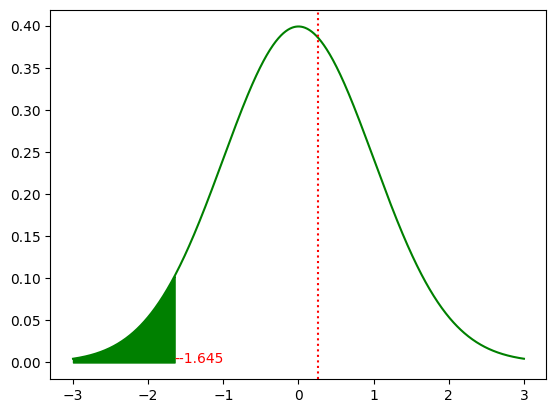

In [14]:
x = np.linspace(-3,3,1000)
y = [stats.norm.pdf(v) for v in x]
Z_critical_left = z_crit


plt.plot(x,y, color='g')
plt.fill_between(x[x<=Z_critical_left],
                 stats.norm.pdf(x[x<=Z_critical_left]),
                 color='g'
                 )
plt.text(Z_critical_left, 0, f"-{Z_critical_left:.3f}", color='r')
plt.axvline(z_cal, ls=':', color='r')

\
<font color='red'>**หากนิยาม P1 และ P2 อีกแนวทาง**</font>   


กำหนดให้   
- P1 แทนสัดส่วนการงอกของเมล็ดจากร้านเดิม  
- P2 แทนสัดส่วนการงอกของเมล็ดจากร้านใหม่  


**สมมติฐาน:**  
H0: P1 - P2 <= -0.05  (หากย้ายข้างก็คือ  P2-P1 >= 0.05 ซึ่งวิธีไม่ต่างจากด้านบน)  
H1: P1 - P2 > -0.05  (หากย้ายข้างก็คือ  P2-P1 < 0.05 ซึ่งวิธีไม่ต่างจากด้านบน)  

**ค่า z_cal**:  
  

In [9]:
z_cal, p_val = proportions_ztest(count=[86, 46],
                                 nobs=[100, 50],
                                 value= -0.05,
                                 alternative='larger',  #ตาม H1
                                 prop_var=0.05 #prop_var มีค่าได้ในช่วง (0,1) ไม่สามารถเป็นลบ, abs(value)
                                 )
z_cal

-0.2649064714130101

**หาค่า z_crit:**   

In [11]:
z_crit = stats.norm.isf(0.05)
print(z_crit)

1.6448536269514729


**หาค่า p-val:**   

In [12]:
p_val

0.6044592435396097

**สรุปผล:**   

z_cal อยู่ในบริเวณยอมรับ H0   
p_val > 0.05  
จึงยอมรับ H0 ร้านค้าใหม่นี้ขายเมล็ดซึ่งมีเปอร์เซ็นต์การงอกสูงกว่าร้านค้าแรกมากกว่าหรือเท่ากับ 5% ที่ α = 0.05

**กราฟแจกแจงความน่าจะเป็น:**   

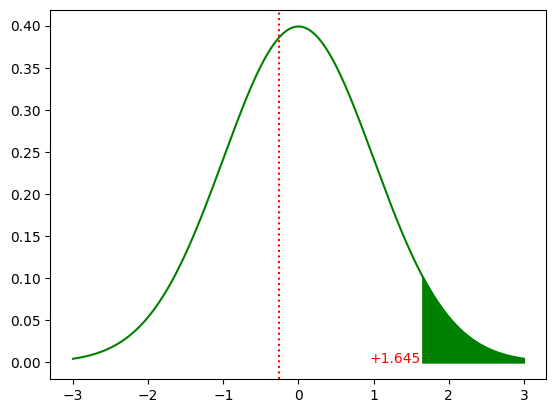

In [14]:
x = np.linspace(-3,3,1000)
y = [stats.norm.pdf(v) for v in x]
Z_critical_right = z_crit

plt.plot(x,y, color='g')
plt.fill_between(x[x>=Z_critical_right],
                 stats.norm.pdf(x[x>=Z_critical_right]),
                 color='g'
                 )
plt.text(Z_critical_right-0.7, 0, f"+{Z_critical_right:.3f}", color='r')
plt.axvline(z_cal, ls=':', color='r')

\
\
6.3 จากชุดข้อมูล "titanic.csv" จงทดสอบว่าส่วนเบี่ยงเบนมาตราฐานข้อมูลอายุผู้โดยสารมีค่าน้อยกว่า 10 ปีหรือไม่ที่ระดับความเชื่อมั่น 99% หากกำหนดให้ข้อมูลอายุผู้โดยสารมีการแจกแจงแบบปกติ


ให้ $𝜎^2$ แทนความแปรปรวนของข้อมูลอายุผู้โดยสารเรือไททานิค  

**สมมติฐาน:**  
H0: $𝜎^2$ >= 100  
H1: $𝜎^2$ < 100

**ค่า chi2_cal**:  

In [16]:
df = pd.read_csv("https://raw.githubusercontent.com/ThammakornS/ProgStat/main/dataset/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
n = 714 #ที่มีข้อมูลอายุครบ df.Age.notnull().sum()
chi2_cal = ((n-1)*np.var(df.Age, ddof=1))/100
chi2_cal

1504.5663594411762

**ค่า chi2_crit**:  

In [20]:
chi2_crit = stats.chi2.ppf(0.01,df=n-1)
chi2_crit

628.1028368095084

**ค่า p_val**:  

In [22]:
p_val = stats.chi2.cdf(chi2_cal, df=n-1)
p_val

1.0

**สรุปผล**:  

- chi2_cal ตกในบริเวณยอมรับ H0  
- p_val > 0.01  
ยอมรับ H0 $𝜎^2$ >= 100 นั่นคือ 𝜎 >= 10 ที่ α = 0.01  
ส่วนเบี่ยงเบนมาตราฐานข้อมูลอายุผู้โดยสารมีมากกว่าหรือเท่ากับ 10 ปี

**กราฟแจกแจงความน่าจะเป็น:**   

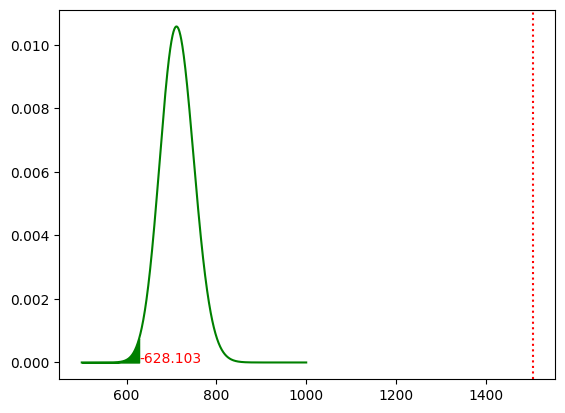

In [26]:
x = np.linspace(500,1000,1000)
y = [stats.chi2.pdf(v, df=n-1) for v in x]
chi2_critical_left = chi2_crit


plt.plot(x,y, color='g')
plt.fill_between(x[x<=chi2_critical_left],
                 stats.chi2.pdf(x[x<=chi2_critical_left], df=n-1),
                 color='g'
                 )
plt.text(chi2_critical_left, 0, f"-{chi2_critical_left:.3f}", color='r')
plt.axvline(chi2_cal, ls=':', color='r')

\
\
6.4 จากข้อ 6.3 จงทดสอบว่ากลุ่มผู้โดยสารชั้น Pclass = 1 มีความแปรปรวนของอายุเท่ากับ กลุ่มผู้โดยสารชั้น Pclass = 2 หรือไม่ที่ระดับนัยสำคัญ 0.05


ให้ $𝜎^2_1$ แทนความแปรปรวนของข้อมูลอายุกลุ่ม Pclass 1   
ให้ $𝜎^2_2$ แทนความแปรปรวนของข้อมูลอายุกลุ่ม Pclass 2    

**สมมติฐาน:**  
H0: $𝜎^2_1/𝜎^2_2 = 1$   
H1: $𝜎^2_1/𝜎^2_2 \ne 1$   

**ค่า f_cal**:  

In [27]:
f_cal = np.var(df.Age[df.Pclass==1], ddof=1) / np.var(df.Age[df.Pclass==2], ddof=1)
f_cal

1.1178104008864762

**ค่า f_crit**:  

In [28]:
dfn = sum(df.Age[df.Pclass==1].notnull())-1
dfd = sum(df.Age[df.Pclass==2].notnull())-1
print(dfn,dfd)
f_crit_left = stats.f.ppf(0.05/2, dfn=dfn, dfd=dfd)
f_crit_right = stats.f.isf(0.05/2, dfn=dfn, dfd=dfd)
print(f_crit_left, f_crit_right)

185 172
0.7454732770065574 1.343577412539335


**ค่า p_val**:  

In [29]:
p_val = 2*min(stats.f.sf(f_cal, dfn=dfn, dfd=dfd), stats.f.cdf(f_cal, dfn=dfn, dfd=dfd))
p_val

0.45933712642977714

**สรุปผล**:  

- chi2_cal ตกในบริเวณยอมรับ  
- p_val > 0.05  

ดังนั้นยอมรับ H0 กลุ่มผู้โดยสารชั้น Pclass = 1 มีความแปรปรวนของอายุเท่ากับ กลุ่มผู้โดยสารชั้น Pclass = 2 ที่ α = 0.05

**กราฟแจกแจงความน่าจะเป็น:**   

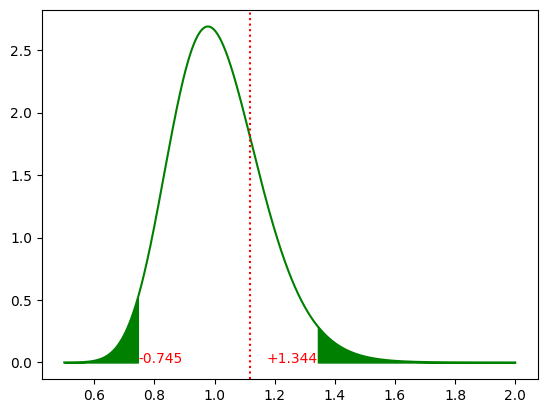

In [41]:
x = np.linspace(0.5,2,1000)
y = [stats.f.pdf(v, dfn=dfn, dfd=dfd) for v in x]


plt.plot(x,y, color='g')
plt.fill_between(x[x>=f_crit_right],
                 stats.f.pdf(x[x>=f_crit_right], dfn=dfn, dfd=dfd),
                 color='g'
                 )
plt.fill_between(x[x<=f_crit_left],
                 stats.f.pdf(x[x<=f_crit_left], dfn=dfn, dfd=dfd),
                 color='g'
                 )
plt.text(f_crit_left, 0, f"-{f_crit_left:.3f}", color='r')
plt.text(f_crit_right-0.17, 0, f"+{f_crit_right:.3f}", color='r')

plt.axvline(f_cal, ls=':', color='r')

\
<font color='red'>***อีกแนวทาง***</font>


ให้ $𝜎^2_1$ แทนความแปรปรวนของข้อมูลอายุกลุ่ม Pclass 2   
ให้ $𝜎^2_2$ แทนความแปรปรวนของข้อมูลอายุกลุ่ม Pclass 1    

**สมมติฐาน:**  
H0: $𝜎^2_1/𝜎^2_2 = 1$   
H1: $𝜎^2_1/𝜎^2_2 \ne 1$   

**ค่า f_cal**:  

In [17]:
f_cal = np.var(df.Age[df.Pclass==2], ddof=1) / np.var(df.Age[df.Pclass==1], ddof=1)
f_cal

0.8946060970688348

**ค่า f_crit**:  

In [18]:
dfn = sum(df.Age[df.Pclass==2].notnull())-1
dfd = sum(df.Age[df.Pclass==1].notnull())-1
print(dfn,dfd)
f_crit_left = stats.f.ppf(0.05/2, dfn=dfn, dfd=dfd)
f_crit_right = stats.f.isf(0.05/2, dfn=dfn, dfd=dfd)
print(f_crit_left, f_crit_right)

172 185
0.7442816399466106 1.3414297076019852


**ค่า p_val**:  

In [19]:
p_val = 2*min(stats.f.sf(f_cal, dfn=dfn, dfd=dfd), stats.f.cdf(f_cal, dfn=dfn, dfd=dfd))
p_val

0.45933712642977653

**สรุปผล**:  

- chi2_cal ตกในบริเวณยอมรับ  
- p_val > 0.05  

ดังนั้นยอมรับ H0 กลุ่มผู้โดยสารชั้น Pclass = 2 มีความแปรปรวนของอายุเท่ากับ กลุ่มผู้โดยสารชั้น Pclass = 1 ที่ α = 0.05

**กราฟแจกแจงความน่าจะเป็น:**   

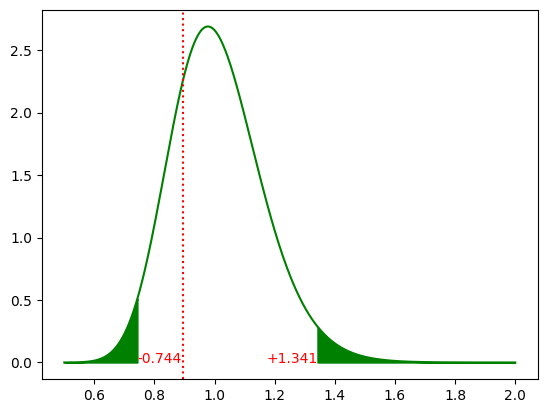

In [20]:
x = np.linspace(0.5,2,1000)
y = [stats.f.pdf(v, dfn=dfn, dfd=dfd) for v in x]


plt.plot(x,y, color='g')
plt.fill_between(x[x>=f_crit_right],
                 stats.f.pdf(x[x>=f_crit_right], dfn=dfn, dfd=dfd),
                 color='g'
                 )
plt.fill_between(x[x<=f_crit_left],
                 stats.f.pdf(x[x<=f_crit_left], dfn=dfn, dfd=dfd),
                 color='g'
                 )
plt.text(f_crit_left, 0, f"-{f_crit_left:.3f}", color='r')
plt.text(f_crit_right-0.17, 0, f"+{f_crit_right:.3f}", color='r')

plt.axvline(f_cal, ls=':', color='r')